In [2]:
import sys
print(sys.executable)

/Users/chicheng/Documents/Dev/causal-inference/venv/bin/python


In [30]:
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms

In [24]:
import numpy as np
import pandas as pd

def generate_ab_data(n=1000, 
                     random_seed=42, 
                     start_date='2021-01-01', 
                     experiment_length=14):
    """
    Generates A/B test data where:
      - Each user is assigned either 'Control' or 'Treatment'.
      - A binary conversion indicator is created.
      - A revenue metric is generated.
      - Each user is randomly assigned a date within the specified experiment_length.
      
    Parameters:
    -----------
    n : int
        Number of users (rows).
    random_seed : int
        Seed for reproducibility.
    start_date : str
        The experiment start date in YYYY-MM-DD format.
    experiment_length : int
        Number of days the experiment will run.
    """
    np.random.seed(random_seed)
    
    # Randomly assign 'Control' or 'Treatment'
    group = np.random.choice(['Control', 'Treatment'], size=n, p=[0.5, 0.5])
    
    # Baseline conversion rates
    conversion_rates = np.where(group == 'Control', 0.30, 0.35)
    
    # Generate binary outcome (Converted / Not Converted)
    converted = np.random.binomial(n=1, p=conversion_rates, size=n)
    
    # Continuous metric, e.g., revenue
    revenue = np.where(group == 'Control',
                       np.random.normal(loc=50, scale=10, size=n),
                       np.random.normal(loc=55, scale=10, size=n))
    
    # Create a range of dates covering the full experiment length
    # For example, if experiment_length=14, this covers from start_date to start_date + 13 days
    date_range = pd.date_range(start=start_date, periods=experiment_length, freq='D')
    
    # Randomly assign each user to one of these days
    assigned_dates = np.random.choice(date_range, size=n)
    
    df_ab = pd.DataFrame({
        'user_id': range(1, n+1),
        'group': group,
        'converted': converted,
        'revenue': revenue,
        'date': assigned_dates
    })
    
    return df_ab

# Example usage:
df_ab = generate_ab_data(n=1000, start_date='2021-01-01', experiment_length=14)
print(df_ab)

     user_id      group  converted    revenue       date
0          1    Control          0  41.220174 2021-01-01
1          2  Treatment          0  58.896142 2021-01-12
2          3  Treatment          1  46.317073 2021-01-09
3          4  Treatment          1  60.346291 2021-01-02
4          5    Control          1  59.135846 2021-01-09
..       ...        ...        ...        ...        ...
995      996    Control          0  44.352260 2021-01-13
996      997  Treatment          1  43.884198 2021-01-12
997      998    Control          0  70.884428 2021-01-06
998      999  Treatment          0  49.685454 2021-01-12
999     1000    Control          0  31.200756 2021-01-10

[1000 rows x 5 columns]


In [27]:
# check how many observations are in each group
df_ab['group'].value_counts()

group
Control      503
Treatment    497
Name: count, dtype: int64

<Axes: xlabel='date'>

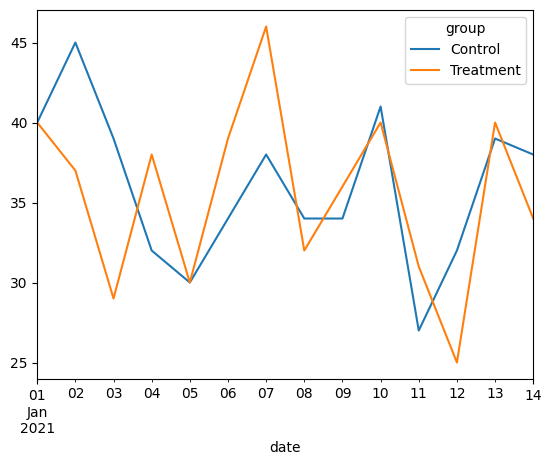

In [28]:
# plot the number of observations in each group over time
df_ab.groupby('date')['group'].value_counts().unstack().plot()

In [36]:
# summarize conversion rate and revenue by group
df_ab.groupby('group')[['converted', 'revenue']].mean()

,converted,revenue
group,,
Control,0.304175,50.353329
Treatment,0.362173,54.804776


In [37]:
# use statsmodels to calculate p-value for conversion rate


NameError: name 'proportions_ztest' is not defined